[Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

# Data Preproccessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("heart.csv")
df = pd.DataFrame(train)
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.rename(columns={
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'Chest_Pain_Type',
    'trtbps': 'Resting_BP_mmHg',
    'chol': 'Cholesterol_mg_dl',
    'fbs': 'Fasting_Blood_Sugar_gt_120',
    'restecg': 'Resting_ECG',
    'thalachh': 'Max_Heart_Rate',
    'exng': 'Exercise_Induced_Angina',
    'oldpeak': 'Previous_Peak',
    'slp': 'Slope',
    'caa': 'Coronary_Artery_Ca',
    'thall': 'Thalassemia',
    'output': 'Heart_Disease_Presence'
}, inplace=True)

In [ ]:
df.head(20)

,Age,Gender,Chest_Pain_Type,Resting_BP_mmHg,Cholesterol_mg_dl,Fasting_Blood_Sugar_gt_120,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Previous_Peak,Slope,Coronary_Artery_Ca,Thalassemia,Heart_Disease_Presence
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


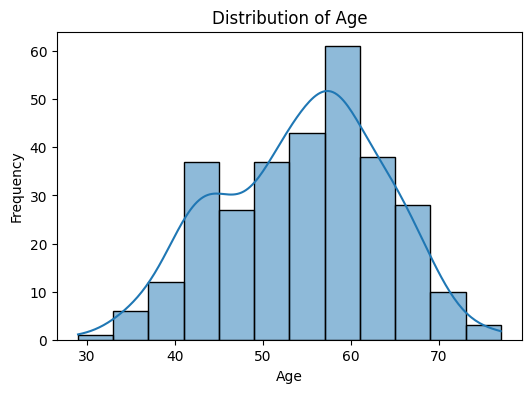

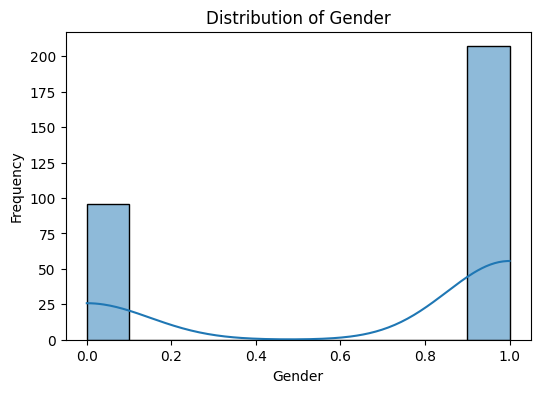

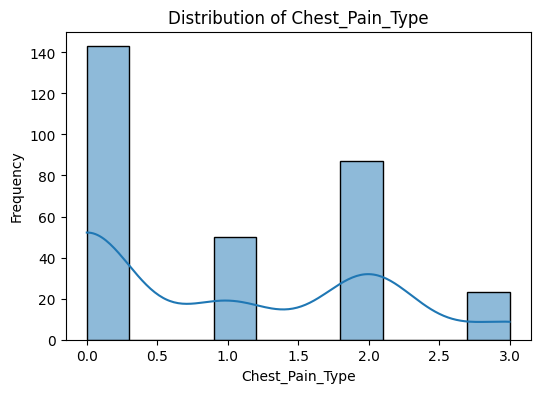

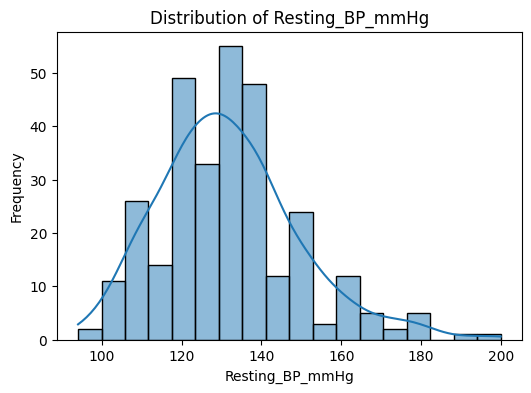

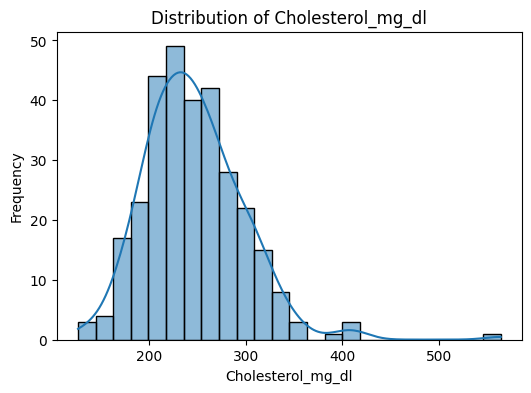

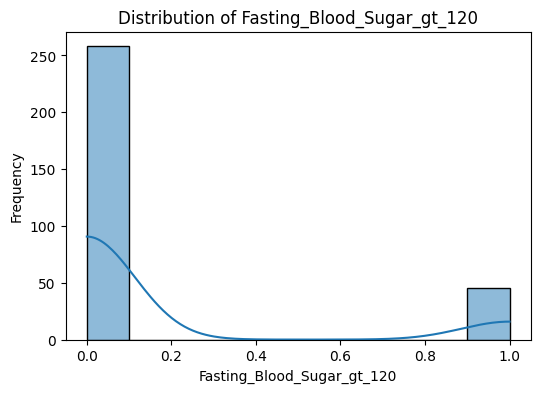

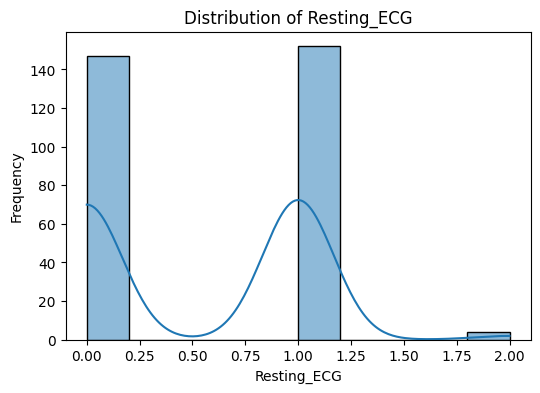

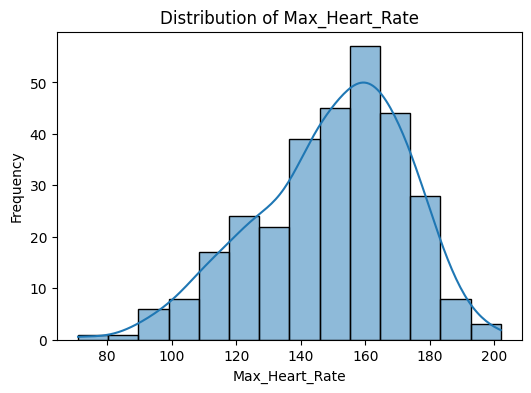

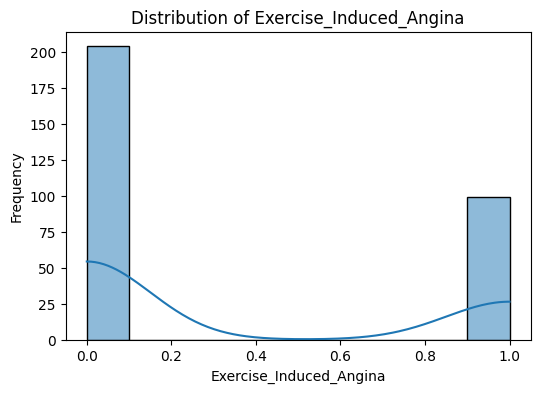

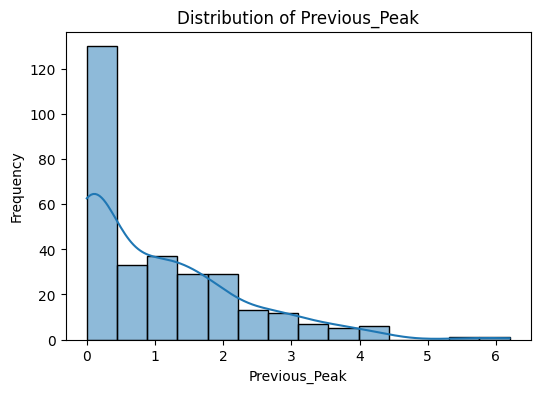

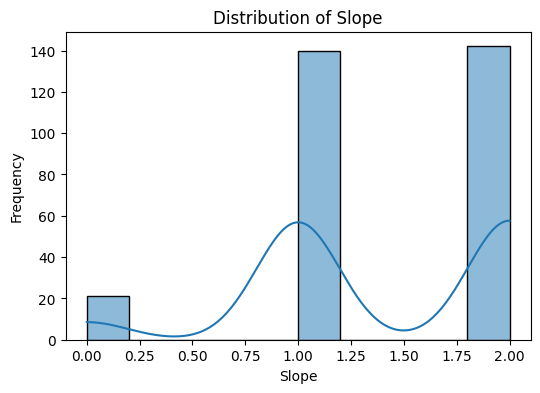

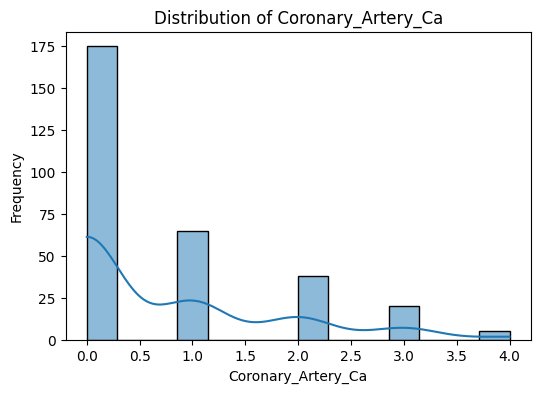

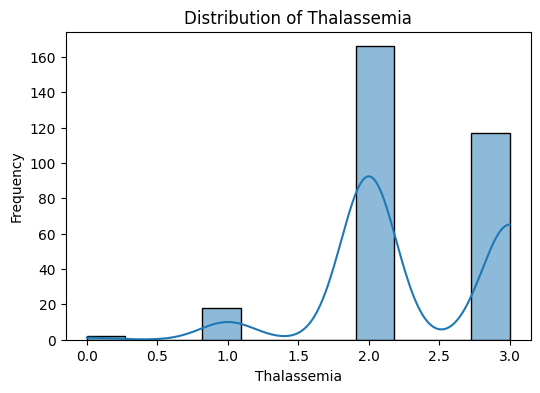

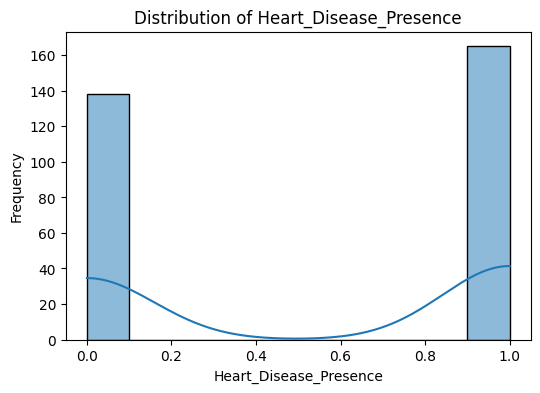

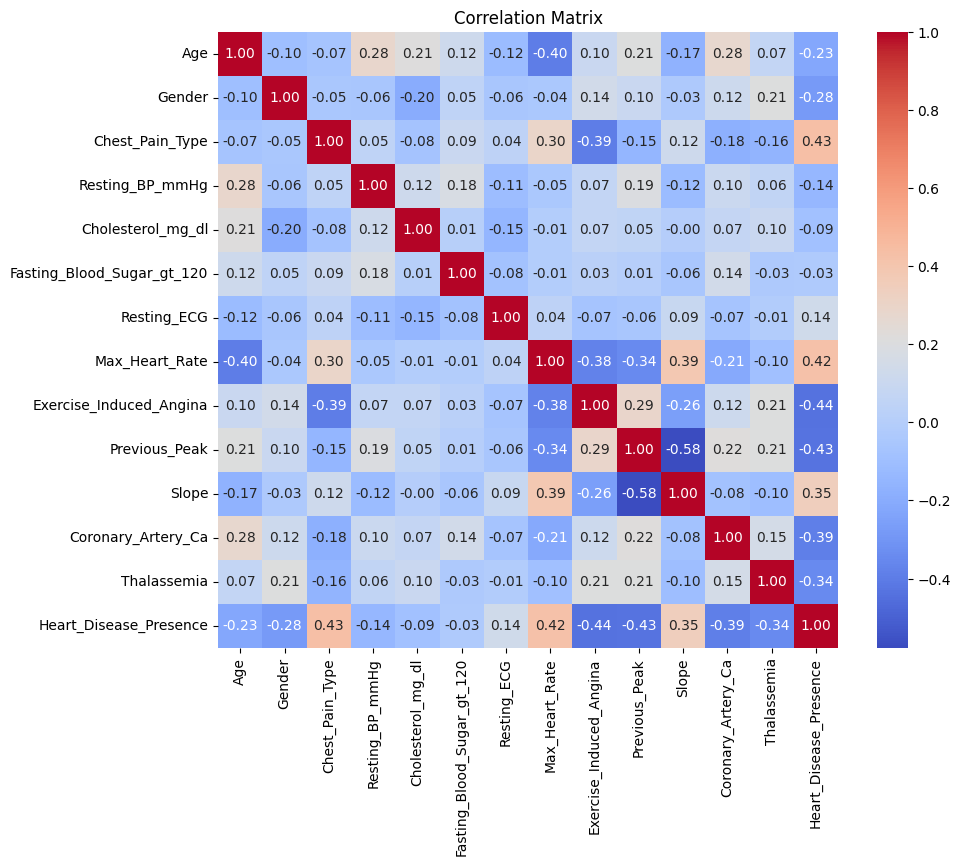

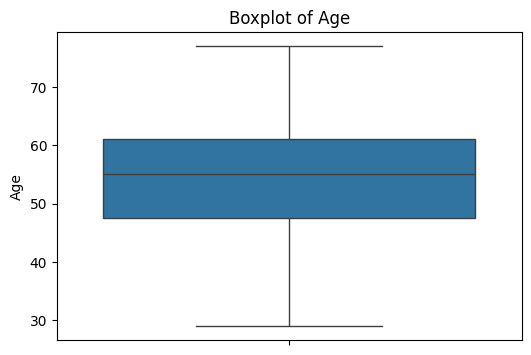

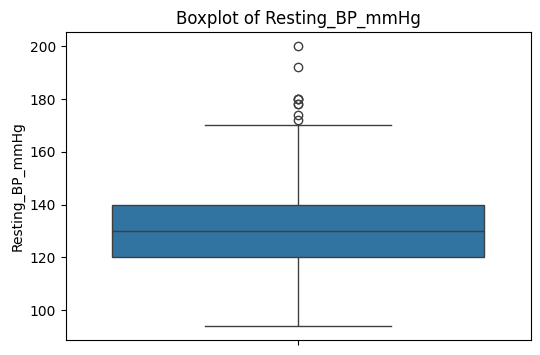

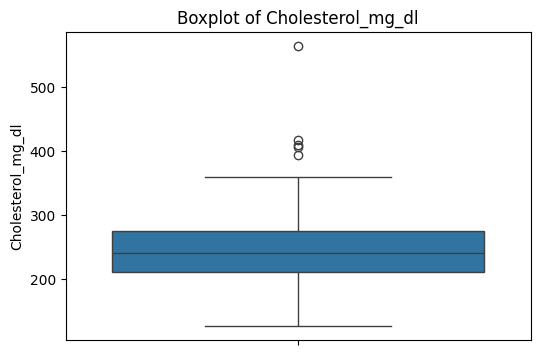

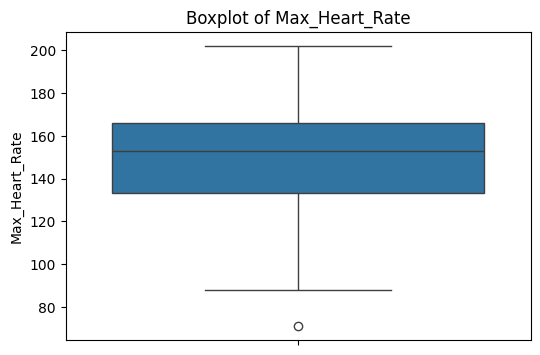

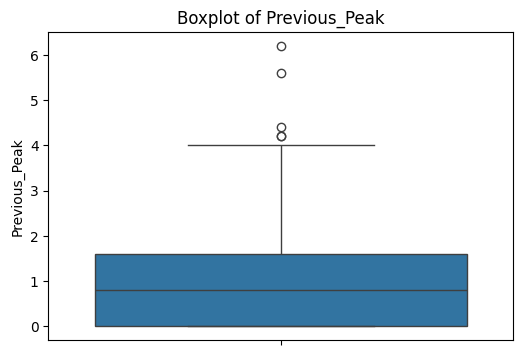

In [ ]:
# Plot distributions for each feature
for column in df.columns:
    plt.figure(figsize=(6, 4))
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Box plots for identifying outliers in continuous columns
for column in ['Age', 'Resting_BP_mmHg', 'Cholesterol_mg_dl', 'Max_Heart_Rate', 'Previous_Peak']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

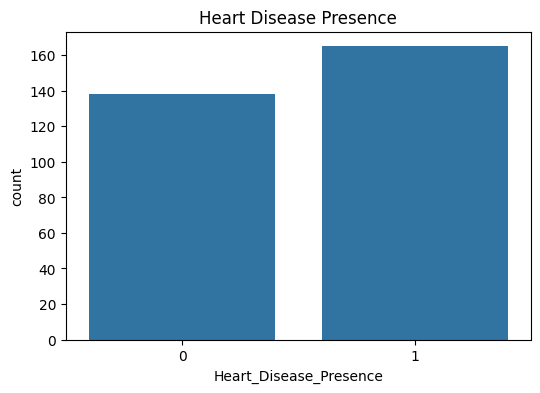

In [ ]:
#plot counts of target
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Heart_Disease_Presence')
plt.title('Heart Disease Presence')
plt.show()

In [ ]:
df.describe()

,Age,Gender,Chest_Pain_Type,Resting_BP_mmHg,Cholesterol_mg_dl,Fasting_Blood_Sugar_gt_120,Resting_ECG,Max_Heart_Rate,Exercise_Induced_Angina,Previous_Peak,Slope,Coronary_Artery_Ca,Thalassemia,Heart_Disease_Presence
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#check for missing data
df.isnull().sum()

,0
Age,0
Gender,0
Chest_Pain_Type,0
Resting_BP_mmHg,0
Cholesterol_mg_dl,0
Fasting_Blood_Sugar_gt_120,0
Resting_ECG,0
Max_Heart_Rate,0
Exercise_Induced_Angina,0
Previous_Peak,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variable (y)
X = df.drop('Heart_Disease_Presence', axis=1)
y = df['Heart_Disease_Presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import export_text, plot_tree

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': range(2,11),
    'min_samples_split': [2,3,5,7,9,11],
    'min_samples_leaf': [1,2,3],
}
DecisionTreeModel = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=DecisionTreeModel, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Decision Tree Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61

Mean cross-validation score: 0.7647108843537415


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Logistic Regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logisticModel = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=logisticModel, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Logistic Regression Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Best Parameters: {'C': 1}
Logistic Regression Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Mean cross-validation score: 0.8180272108843537


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [5000]
}

neuralModel = MLPClassifier(random_state=42)
grid_search = GridSearchCV(estimator=neuralModel, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)

# Output results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Neural Network Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'max_iter': 5000, 'solver': 'sgd'}
Neural Network Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Mean cross-validation score: 0.8262755102040815


In [ ]:
# Gaussian NB
param_grid = {'var_smoothing': [1e-17,1e-14,1e-11,1e-8,1e-5, 1e-2, 1e1, 1e4, 1e7, 1e10]}
gaussianModel = GaussianNB()
grid_search = GridSearchCV(estimator=gaussianModel, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Gaussian Naive Bayes Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Best Parameters: {'var_smoothing': 1e-17}
Gaussian Naive Bayes Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Mean cross-validation score: 0.789030612244898


In [ ]:
# Bernoulli NB
param_grid = {'alpha': [0.001,0.01, 0.1, 1.0, 10.0, 100, 1000]}
bernoulliModel = BernoulliNB()
grid_search = GridSearchCV(estimator=bernoulliModel, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Bernoulli Naive Bayes Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Best Parameters: {'alpha': 100}
Bernoulli Naive Bayes Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Mean cross-validation score: 0.8429421768707483


In [ ]:
# kNN Model
param_grid = {'n_neighbors': range(1,16)}
knnModel = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knnModel, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"k-Nearest Neighbors Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Best Parameters: {'n_neighbors': 14}
k-Nearest Neighbors Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Mean cross-validation score: 0.8223639455782313


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# Comparison

In [ ]:
# Model performance results with added cross-validation scores for each model
performanceResults = {
    "Model": ["Decision Tree", "Logistic Regression", "Neural Network",
              "Gaussian NB", "Bernoulli NB", "k-Nearest Neighbors"],
    "Test Accuracy": [0.8361, 0.8525, 0.8525, 0.8689, 0.8689, 0.8689],
    "Mean Cross-Validation Score": [0.7647, 0.8180, 0.8263, 0.7890, 0.8429, 0.8224],
    "Weighted Precision": [0.85, 0.85, 0.86, 0.87, 0.87, 0.87],
    "Weighted Recall": [0.84, 0.85, 0.85, 0.87, 0.87, 0.87],
    "Weighted F1-Score": [0.84, 0.85, 0.85, 0.87, 0.87, 0.87]
}

# Create DataFrame
performanceComparison = pd.DataFrame(performanceResults)
performanceComparison = performanceComparison.sort_values(by="Test Accuracy", ascending=False).reset_index(drop=True)
performanceComparison

,Model,Test Accuracy,Mean Cross-Validation Score,Weighted Precision,Weighted Recall,Weighted F1-Score
0,Gaussian NB,0.8689,0.7890,0.87,0.87,0.87
1,Bernoulli NB,0.8689,0.8429,0.87,0.87,0.87
2,k-Nearest Neighbors,0.8689,0.8224,0.87,0.87,0.87
3,Logistic Regression,0.8525,0.8180,0.85,0.85,0.85
4,Neural Network,0.8525,0.8263,0.86,0.85,0.85
5,Decision Tree,0.8361,0.7647,0.85,0.84,0.84


<Figure size 1000x600 with 0 Axes>

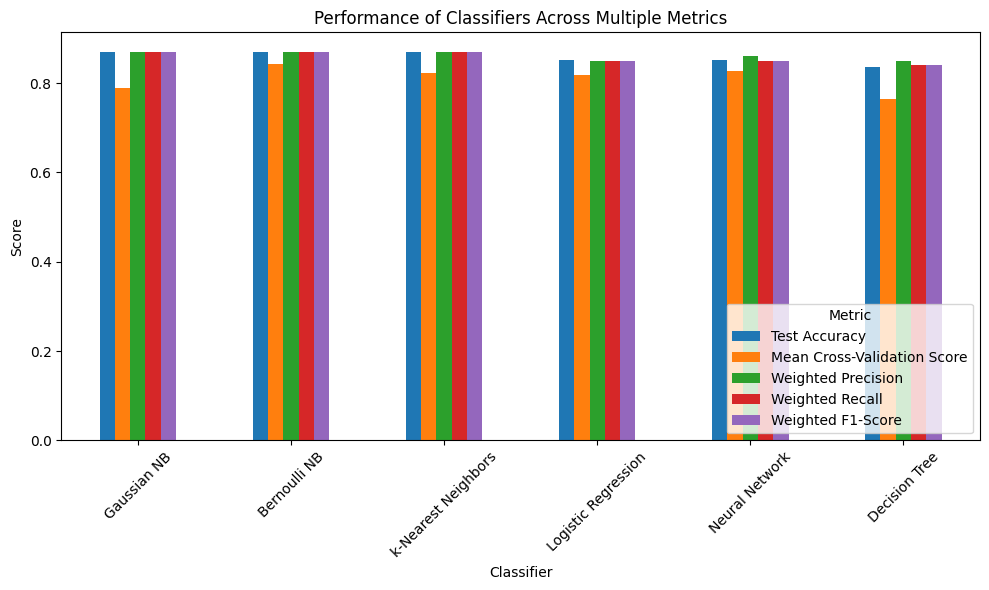

In [ ]:
#visualize bar chart for accuracy, precision, recall, and F1-Score for each classifier
plt.figure(figsize=(10, 6))

performanceComparison.set_index('Model', inplace=True)
performanceComparison.plot(kind='bar', figsize=(10, 6))

plt.title('Performance of Classifiers Across Multiple Metrics')
plt.ylabel('Score')
plt.xlabel('Classifier')
plt.xticks(rotation=45)
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


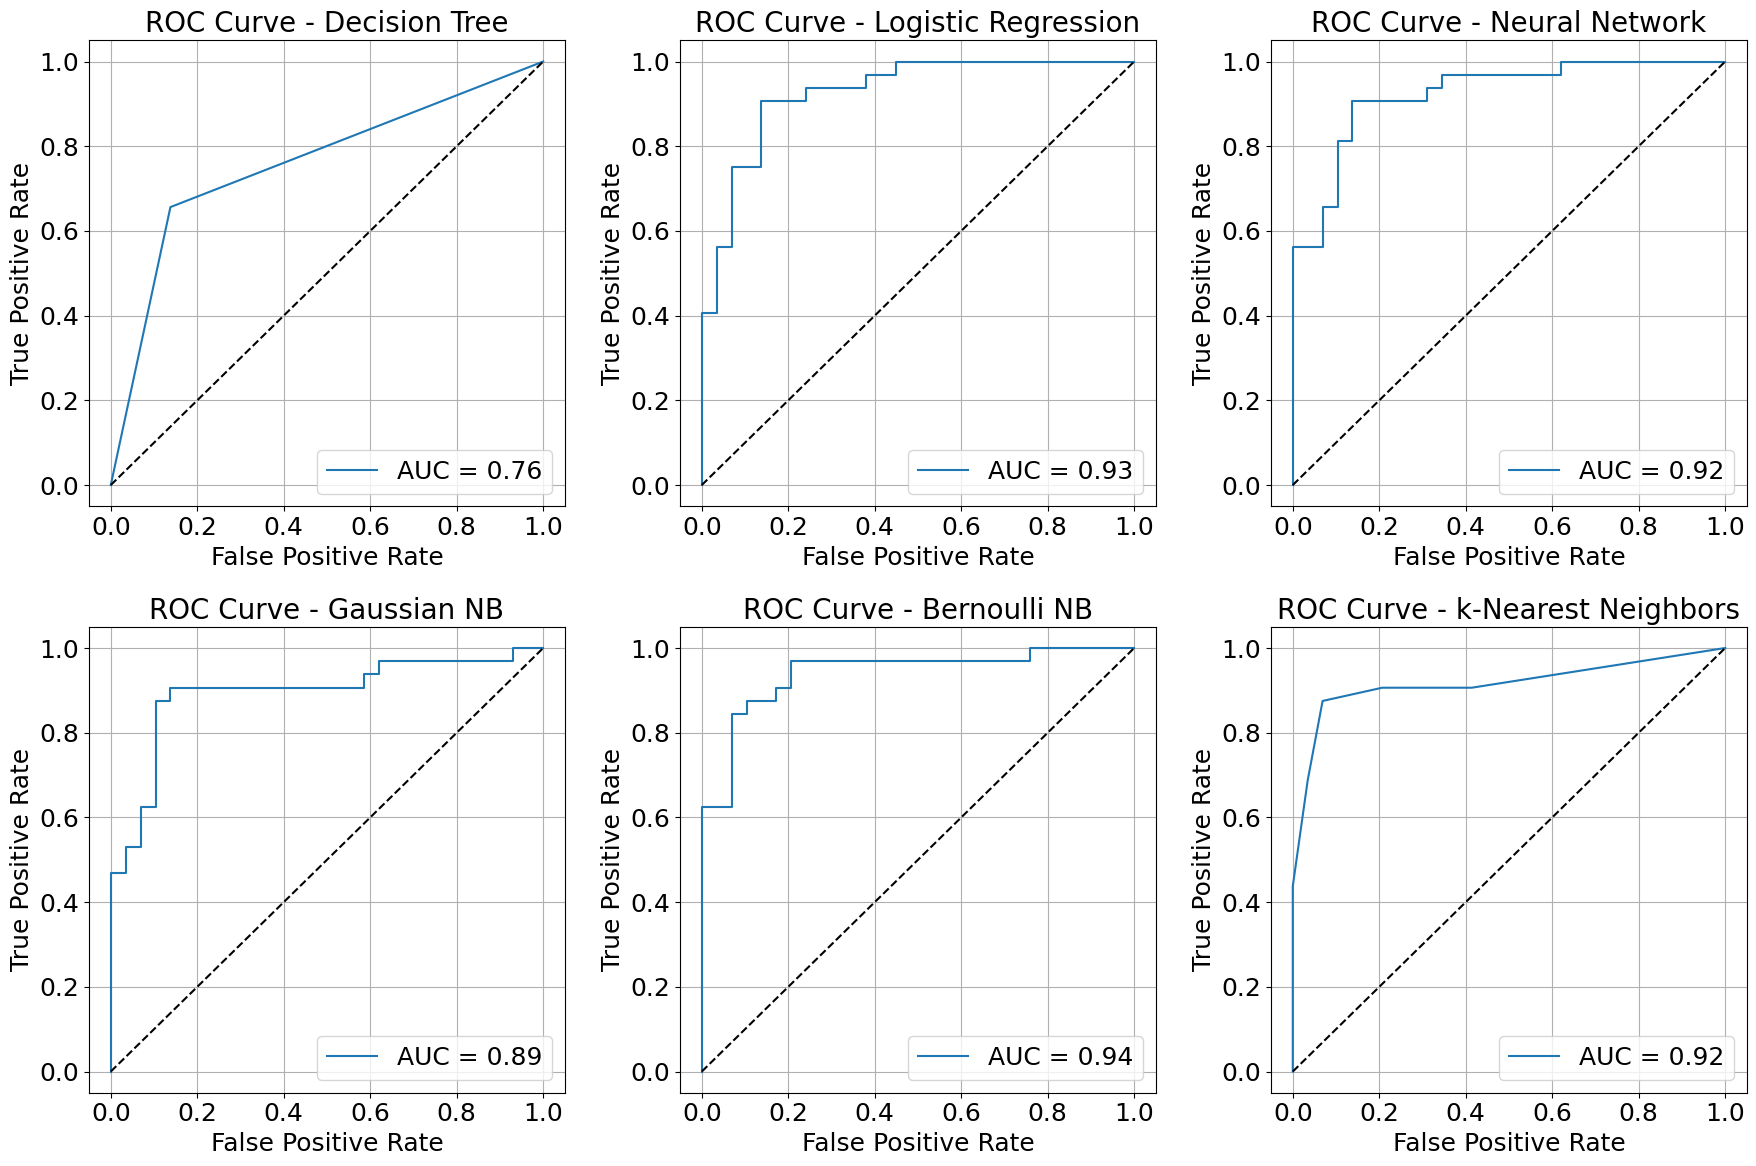

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


# List of models and their names for ROC curve plotting
models = [DecisionTreeModel, logisticModel, neuralModel, gaussianModel, bernoulliModel, knnModel]
model_names = ["Decision Tree", "Logistic Regression", "Neural Network",
               "Gaussian NB", "Bernoulli NB", "k-Nearest Neighbors"]

# Create a single figure with 6 subplots for ROC curves
plt.figure(figsize=(18, 12))
for i, (model, name) in enumerate(zip(models, model_names), 1):
    # Generate predictions and calculate ROC curve
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Plot each ROC curve in a subplot
    plt.subplot(2, 3, i)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}', fontsize =20)
    plt.legend(loc='lower right', fontsize = 18)
    plt.grid(True)

# Adjust layout and display the combined figure
plt.tight_layout()
plt.show()


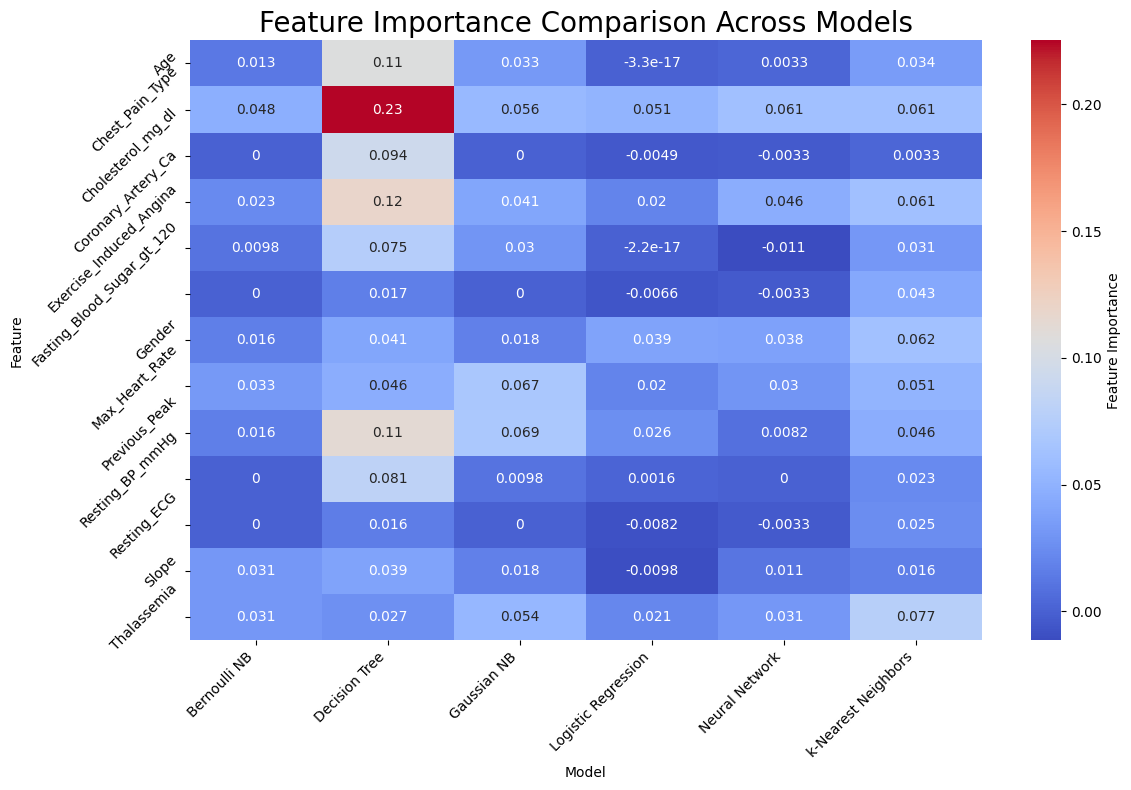

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of models
models = {
    "Decision Tree": DecisionTreeModel,
    "Logistic Regression": logisticModel,
    "Neural Network": neuralModel,
    "Gaussian NB": gaussianModel,
    "Bernoulli NB": bernoulliModel,
    "k-Nearest Neighbors": knnModel
}

all_importances = pd.DataFrame()

for name, model in models.items():
    # For models with feature_importances_ attribute (like Decision Trees)
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        # Use permutation importance for models without feature_importances_
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
        importances = result.importances_mean

    model_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances,
        'Model': name
    })

    all_importances = pd.concat([all_importances, model_importance], axis=0)

all_importances.reset_index(drop=True, inplace=True)
importance_matrix = all_importances.pivot_table(index="Feature", columns="Model", values="Importance")

plt.figure(figsize=(12, 8))
sns.heatmap(
    importance_matrix,
    annot=True,
    cmap="coolwarm",
    cbar_kws={'label': 'Feature Importance'},
    xticklabels=importance_matrix.columns,
    yticklabels=importance_matrix.index
)

# Angle the x-axis labels at 45 degrees
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Feature Importance Comparison Across Models', fontsize = 20)
plt.tight_layout()
plt.show()
